<a href="https://colab.research.google.com/github/moridin04/CCADMACL-Research/blob/main/Fraud_Detection_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring Anomaly Detection Techniques for Fraudulent Credit Card Transactions**

### [Problem Statement](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)
> **Our current credit scoring systems often limit access to fair credit, especially for people with non-traditional income sources or limited credit histories. As a community, we aim to create an inclusive, transparent, and fair credit scoring model that reduces bias, considers diverse financial backgrounds, and opens doors to responsible credit for all. This will promote economic mobility and set a new standard for equitable lending practices.**


### **Our Goals**
**Given a person’s credit-related information, build a machine learning model that can classify the credit score.**

# **1. Environment Setup**

**1.1 Tools and Libraries Installation**

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# 2. **Importing Libraries**

**2.1 Essential Libraries for Data Analysis**

In [170]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

**2.2 Libraries for Machine Learning and Visualization**

In [87]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.neighbors import LocalOutlierFactor

#3. **Loading Data**

**3.1 Loading the Kaggle Credit Card Fraud Dataset**

In [88]:
cfd = pd.read_csv('creditcard.csv')

#4. **Exploration of Data**

### **Glimpse of the Dataset**

**4.1 Displaying the First Few Rows**


In [89]:
cfd

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**4.1.2 Dataset Information (Shape, Columns, Null Values, Data Types)**

In [90]:
print(f"Shape:  {cfd.shape}\n")
print(f"Columns:  {cfd.columns}\n")
print(f"Null Values:  \n{cfd.isnull().sum()}\n")
print(f"Data Types: \n{cfd.dtypes}")

Shape:  (284807, 31)

Columns:  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Null Values:  
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Data Types: 
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64


**4.2 Summary Statistics for Numerical Features**

In [91]:
print(cfd.describe(include='all'))

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

**4.2.1 Class Distribution (Fraud vs. Non-Fraud)**

In [92]:
class_distribution = cfd['Class'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


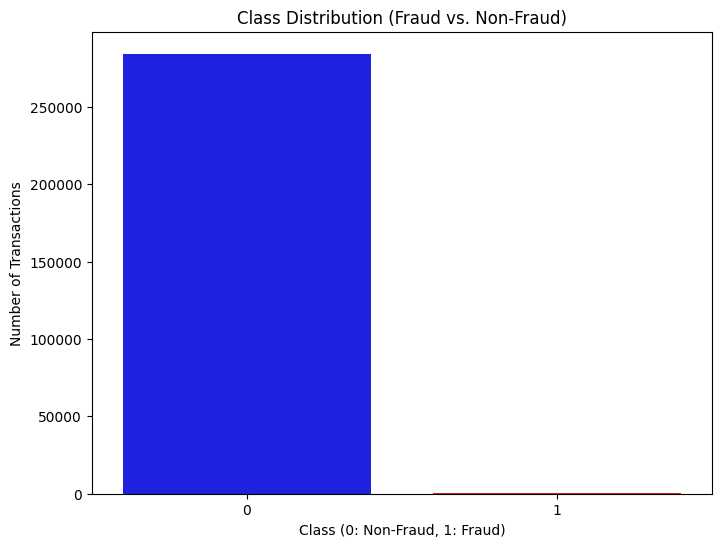

In [93]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=cfd, hue='Class', palette=['blue', 'red'], legend=False)
plt.title('Class Distribution (Fraud vs. Non-Fraud)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.show()

### **Distribution of Independent Variable**

**4.3 Distribution of Amount**

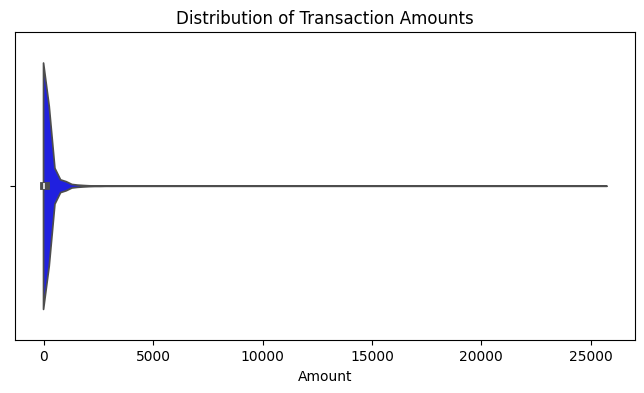

In [94]:
plt.figure(figsize=(8, 4))
sns.violinplot(x=cfd["Amount"], color="blue")  # Use a valid color name
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.show()

**4.3.1 Distribution of Time**

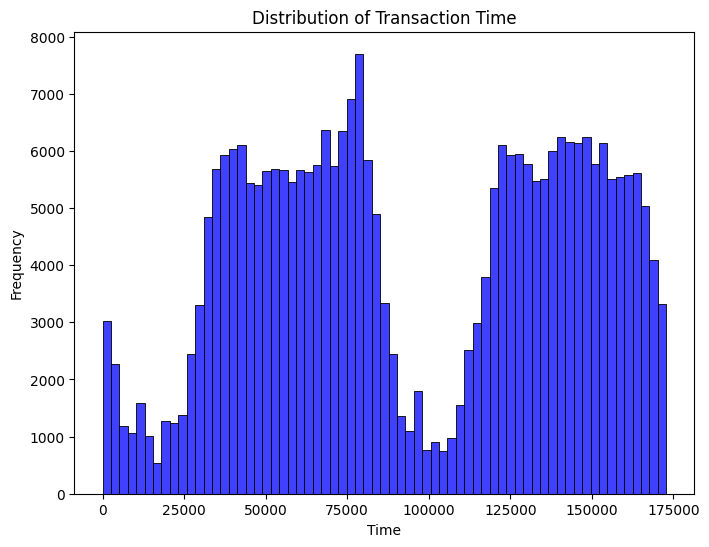

In [95]:
plt.figure(figsize=(8, 6))
sns.histplot(cfd['Time'], kde=False, color="blue")
plt.title('Distribution of Transaction Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

### **Dataset Histogram**

**4.4 Histograms for Key Features (V1-V28, Amount, Time)**

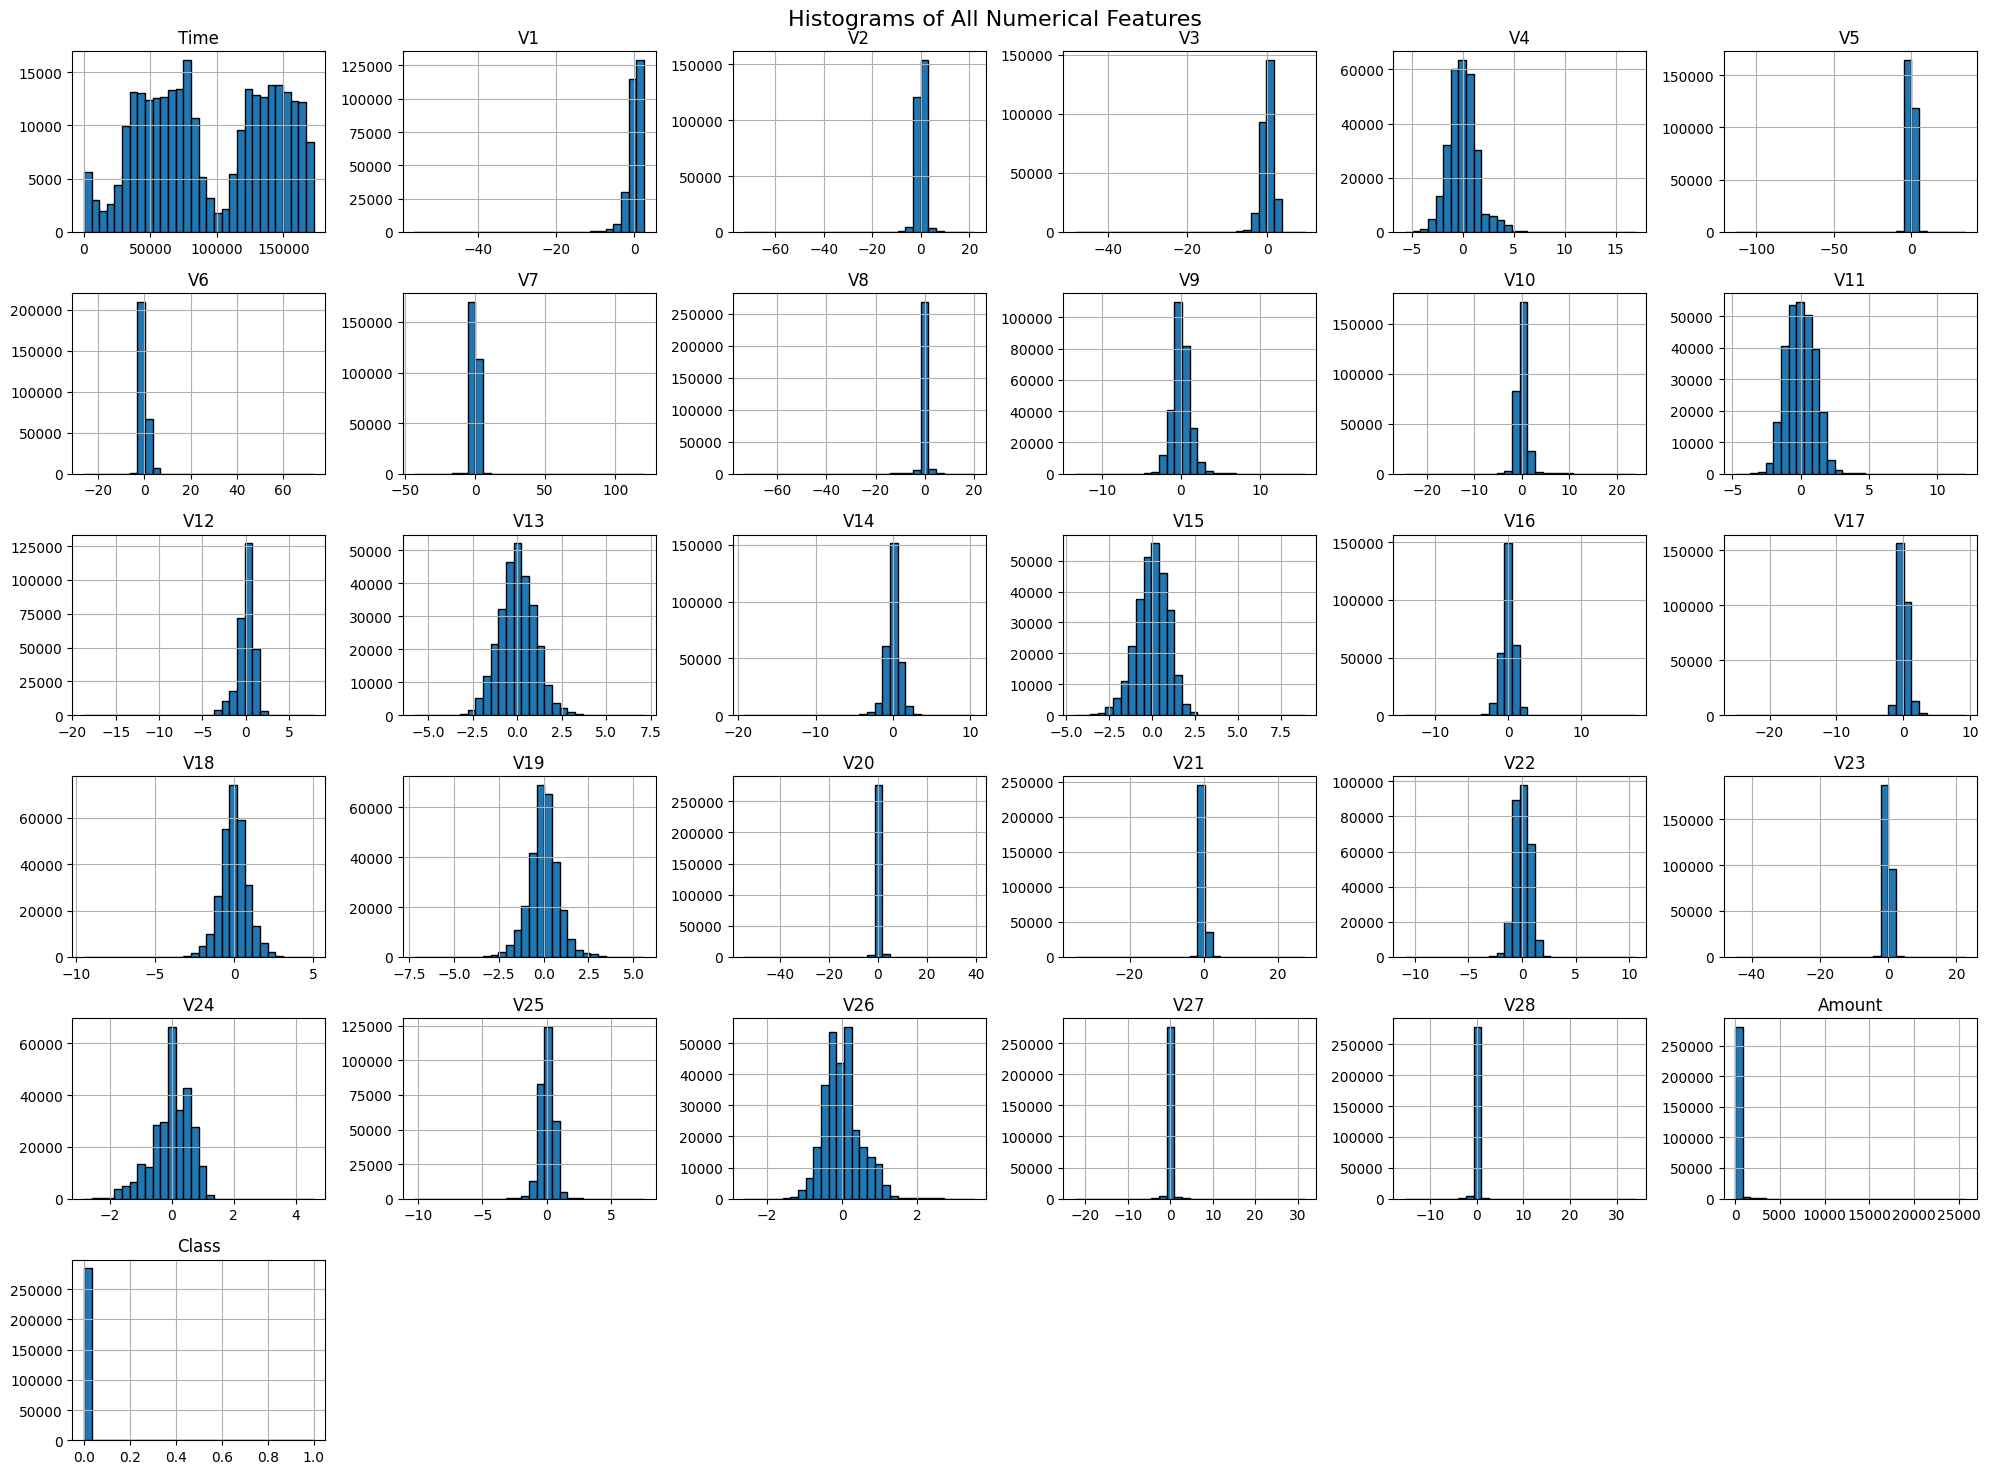

In [96]:
cfd.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle("Histograms of All Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# **5. Pre-processing of Data**

**5.1 Checking of Null Values**

In [97]:
print("\nChecking for Null Values:")
cfd.isnull().sum()


Checking for Null Values:


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Takeaway: As the count shows, we have no missing values given the pre-processing done prior.

**5.2 Checking of Outliers**

In [98]:
Q1 = cfd['Amount'].quantile(0.25)
Q3 = cfd['Amount'].quantile(0.75)
IQR = Q3 - Q1

outliers = cfd[(cfd['Amount'] < (Q1 - 1.5 * IQR)) | (cfd['Amount'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in 'Amount': {len(outliers)}")

Number of outliers in 'Amount': 31904


**5.3 Checking of Duplicate Transactions**

In [99]:
cfd.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
284802,False
284803,False
284804,False
284805,False


In [100]:
duplicate_counts = cfd.duplicated().value_counts()
print(duplicate_counts)

False    283726
True       1081
Name: count, dtype: int64


In [101]:
duplicate_counts = cfd.duplicated().value_counts()
print("Duplicate Counts before removal:\n", duplicate_counts)

cfd = cfd.drop_duplicates(keep='first')

duplicate_counts = cfd.duplicated().value_counts()
print("\nDuplicate Counts after removal:\n", duplicate_counts)

Duplicate Counts before removal:
 False    283726
True       1081
Name: count, dtype: int64

Duplicate Counts after removal:
 False    283726
Name: count, dtype: int64


**5.4 Feature Selection/Reduction**

**5.4.1 Correlation Matrix for Numerical Features**

In [102]:
correlation_matrix = cfd.corr()

**5.4.2 Heatmap Visualization**

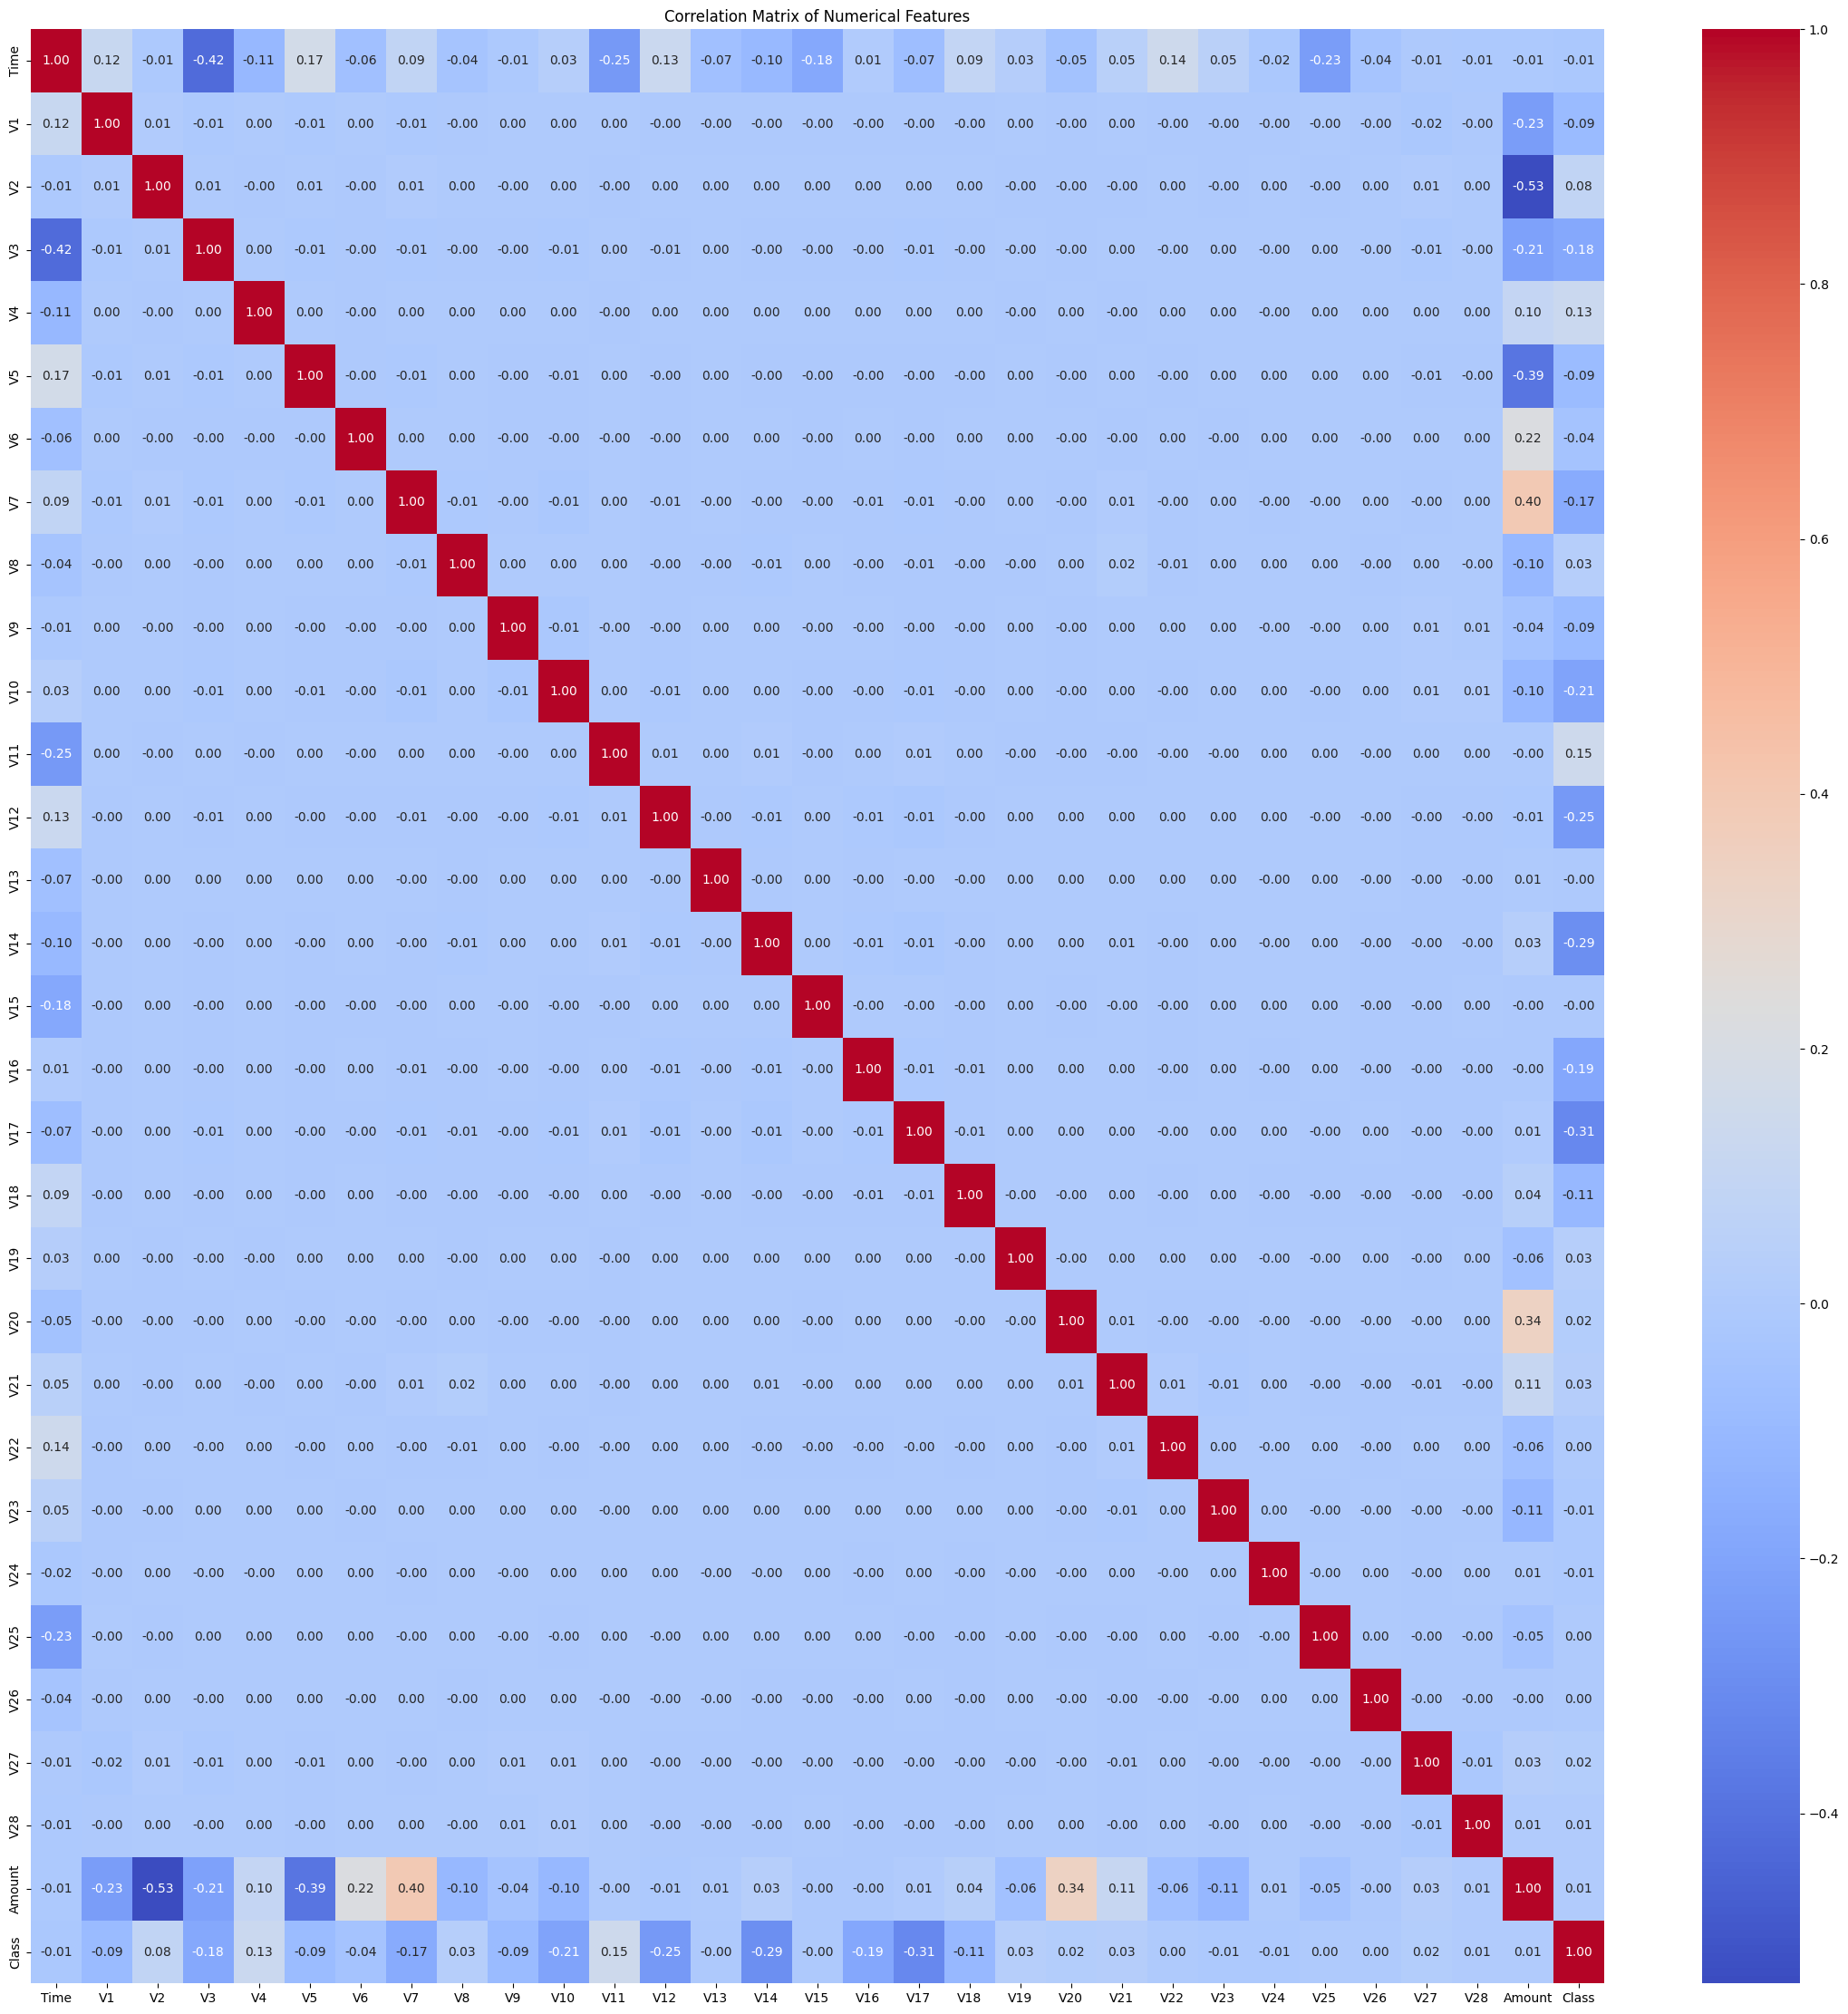

In [103]:
plt.figure(figsize=(28, 28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**5.4.3 Dropping Irrelevant Features**

In [104]:
threshold = 0.8
high_corr_features = set()
correlation_matrix = cfd.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

print("Highly correlated features to drop:", high_corr_features)


Highly correlated features to drop: set()


In [105]:
cfd.drop(columns=high_corr_features, inplace=True)
print(f"Updated dataset shape: {cfd.shape}")


Updated dataset shape: (283726, 31)


<ipython-input-105-f8e6e9dff801>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cfd.drop(columns=high_corr_features, inplace=True)


### **Application of Standard Scaler**

**5.5 Feature Scaling**

**5.5.1 Standardization (Z-Score Scaling)**

<Axes: >

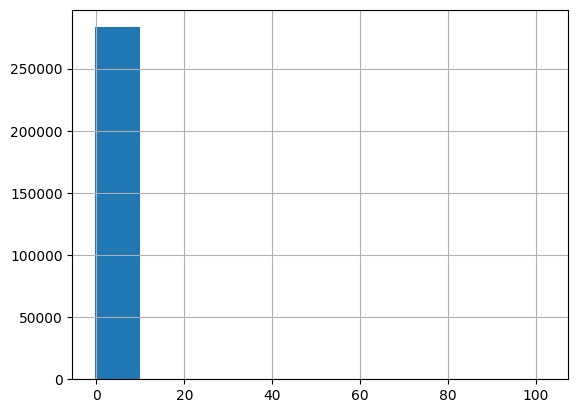

In [106]:
new_df = cfd.copy()
new_df['Amount'] = StandardScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))
new_df['Amount'].hist()

In [107]:
new_df['Amount'].describe()

,Amount
count,2.837260e+05
mean,-5.409347e-17
std,1.000002e+00
min,-3.533268e-01
25%,-3.309625e-01
50%,-2.654671e-01
75%,-4.378088e-02
max,1.022476e+02


**5.5.2 Normalization (Min-Max Scaling)**

In [108]:
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())
new_df
#Time values are now between 0 and 1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


**5.6 Sampling of New Dataframe**

In [109]:
new_df = new_df.sample(frac=1, random_state=1)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33560,0.215768,-1.071719,-4.343904,-0.497727,-0.277591,-2.482346,-0.472073,0.991747,-0.414207,1.694252,...,0.856441,0.013647,-1.183439,0.536058,0.064148,-0.016945,-0.179133,0.236036,4.506916,0
57869,0.278456,1.314915,-0.980378,-0.032665,-2.770975,-1.047365,-0.705180,-0.491240,-0.076395,0.571959,...,-0.416346,-0.481886,-0.009117,0.009622,0.555844,-0.836622,0.099256,0.014826,-0.248255,0
187479,0.738194,-1.680526,-0.959150,-1.329705,-1.028361,-0.730922,0.253124,3.308312,-0.480062,0.157630,...,-0.084593,-0.204108,0.517400,-0.611013,-0.445912,-0.409744,0.231809,0.253554,2.365973,0
243555,0.879526,2.114488,0.169976,-2.051966,0.070326,0.481642,-1.819440,0.886700,-0.673729,0.077960,...,0.163748,0.642597,-0.058720,0.128632,0.461792,0.234073,-0.082360,-0.075323,-0.301729,0
96229,0.380081,-5.277692,3.487837,-1.201844,-0.192904,-0.158582,0.949549,0.467901,-0.788434,4.652615,...,-0.477313,-1.077669,0.160074,-1.535126,0.873245,-0.322503,1.383375,0.758996,-0.237911,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21515,0.183562,1.221811,-0.622699,0.271691,-0.507132,-1.093817,-1.303639,-0.166317,-0.390254,-1.080318,...,0.302138,0.641491,-0.168266,0.791311,0.586821,-0.150528,-0.016895,0.032471,0.068200,0
118050,0.433643,1.069132,-0.159789,1.913486,2.811710,-0.690517,1.942449,-1.259828,0.577277,1.031453,...,0.046602,0.725405,-0.199566,-0.678442,0.552088,0.328766,0.118229,0.029660,-0.353327,0
73633,0.319552,-0.891311,0.808612,1.263076,0.522615,1.183978,0.905303,0.565347,0.186910,-1.042086,...,0.129436,0.443403,-0.327563,-1.315188,0.647441,-0.057036,-0.014691,0.038455,-0.281681,0
268346,0.944280,-0.358224,1.446564,-1.175105,0.075659,2.041475,-1.677117,1.568559,-0.415562,-1.073097,...,0.078727,0.333168,-0.350660,0.947248,0.196432,0.700004,0.079430,0.208233,-0.350292,0


**Handling Data Imbalance**

In [110]:
x = new_df.drop(columns=['Class'])
y = new_df['Class']

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

print(f"Train size: {x_train.shape}, Test size: {x_test.shape}, Validation size: {x_val.shape}")

Train size: (226980, 30), Test size: (28373, 30), Validation size: (28373, 30)


# **6. Machine Learning**

**SMOTE - Synthetic Minority Oversampling Technique**

In [112]:
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)
print("After SMOTE:")
print(y_train_smote.value_counts())

After SMOTE:
Class
0    226602
1    226602
Name: count, dtype: int64


In [113]:
new_df_resampled = pd.DataFrame(x_train_smote, columns=x.columns)
new_df_resampled['Class'] = y_train_smote

In [114]:
not_frauds = new_df_resampled.query('Class == 0')
frauds = new_df_resampled.query('Class == 1')
not_frauds['Class'].value_counts(), frauds['Class'].value_counts()

(Class
 0    226602
 Name: count, dtype: int64,
 Class
 1    226602
 Name: count, dtype: int64)

**New Balanced Dataset**

In [115]:
balanced_cfd = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_cfd = balanced_cfd.sample(frac=1, random_state=1)
balanced_cfd.to_csv('balanced_creditcard.csv', index=False)

print("Class distribution after balancing:")
print(balanced_cfd["Class"].value_counts())

Class distribution after balancing:
Class
1    226602
0    226602
Name: count, dtype: int64


In [116]:
balanced_cfd = balanced_cfd.sample(frac=1, random_state=1)
balanced_cfd

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
411337,0.967307,1.249770,1.321999,-4.948089,1.335919,0.417670,-1.348534,-1.403166,0.254456,-1.211348,...,0.356889,-0.000370,-0.154998,-0.056818,0.524254,0.741876,0.361798,0.180993,-0.345345,1
201390,0.401506,1.075676,-0.281544,1.317319,0.752709,-0.977419,0.361756,-0.815565,0.359194,0.695108,...,-0.000545,0.171275,0.074325,0.252557,0.113667,0.317260,0.027618,0.015541,-0.307400,0
345035,0.406546,-0.616358,0.850305,1.173982,0.118248,-0.205378,-0.702585,0.778313,-0.041519,-0.188901,...,0.126566,0.339346,-0.153688,0.423147,-0.126544,0.102615,-0.108477,-0.039641,-0.018613,1
20249,0.347638,-1.478326,-0.533080,0.175471,-4.399240,-0.406305,-0.639321,0.988531,0.204486,-0.102711,...,-0.172359,-0.349342,-0.063196,-0.780918,1.207097,-0.826690,-0.108381,-0.050498,0.428985,0
168771,0.080357,1.111735,-0.210912,0.944342,0.725992,-0.447282,0.559892,-0.690100,0.080376,2.024269,...,-0.036724,0.269132,-0.156549,-0.612058,0.340632,0.600073,-0.009933,0.017345,-0.117703,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108655,0.851967,1.963594,-0.009081,-1.772260,0.573849,0.049588,-1.450778,0.246240,-0.321969,0.743998,...,0.215711,0.655866,-0.039403,-0.103550,0.186597,-0.099442,-0.014291,-0.026362,-0.165786,0
202414,0.860080,2.316616,-1.448038,-1.116083,-1.611602,-1.130000,-0.451628,-1.202019,-0.125566,-1.006167,...,-0.065351,0.284133,0.156950,0.454448,-0.058034,-0.042462,0.003124,-0.048663,-0.273454,0
368583,0.053743,-1.597261,3.245901,-4.151058,2.344241,-1.408927,-1.863901,-3.515648,1.521442,-1.201474,...,0.505607,-0.534480,-0.072367,-0.423600,0.117610,0.324308,0.265332,0.129442,-0.345033,1
65793,0.474750,1.508223,-1.199004,0.335936,-1.694404,-1.221495,0.196854,-1.354428,0.072049,-1.791351,...,-0.075252,0.137445,-0.171660,-0.829800,0.463860,-0.050724,0.044211,0.008235,-0.242703,0


In [117]:
balanced_cfd.shape

(453204, 31)

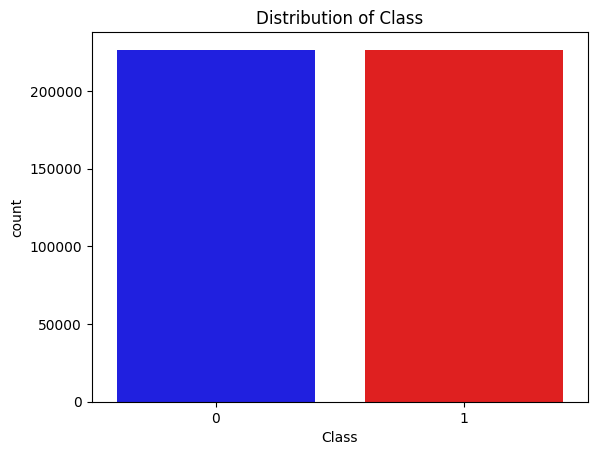

In [118]:
palette = ['blue', 'red']
sns.countplot(data=balanced_cfd, x='Class', hue='Class', palette=palette, legend=False)
plt.title('Distribution of Class')
plt.show()

**Train, Test, and Validation**

**Splitting the Dataset into Training and Testing Sets**

In [119]:
x_train_b, x_test_val_b, y_train_b, y_test_val_b = train_test_split(
    balanced_cfd.drop(columns=['Class']), balanced_cfd['Class'], test_size=0.3, stratify=balanced_cfd['Class'], random_state=42
)

x_test_b, x_val_b, y_test_b, y_val_b = train_test_split(
    x_test_val_b, y_test_val_b, test_size=0.5, stratify=y_test_val_b, random_state=42
)

In [120]:
print("Train set class distribution:")
print(y_train_b.value_counts())
print("\nTest set class distribution:")
print(y_test_b.value_counts())
print("\nValidation set class distribution:")
print(y_val_b.value_counts())

Train set class distribution:
Class
1    158621
0    158621
Name: count, dtype: int64

Test set class distribution:
Class
1    33991
0    33990
Name: count, dtype: int64

Validation set class distribution:
Class
0    33991
1    33990
Name: count, dtype: int64


**Algorithms - Unsupervised Anomaly Detection**

**Isolation Forest - Unbalanced Dataset**

In [172]:
inliers = new_df[new_df.Class==0].drop(['Class'], axis=1)
outliers = new_df[new_df.Class==1].drop(['Class'], axis=1)

inliers_train, inliers_test = train_test_split(inliers, test_size=0.30, random_state=42)

In [173]:
inliers_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223796,0.830623,-2.244755,0.395817,-0.316219,0.614475,-3.231080,2.731445,3.283887,0.592139,-0.975147,...,-0.097396,-0.316473,-1.071948,0.575303,0.208661,0.590540,-0.879275,0.051621,-0.322991,2.937900
125181,0.448869,-0.454413,1.031233,1.573407,-0.021973,0.013922,-0.903803,0.738138,-0.102144,-0.494535,...,0.164196,-0.213060,-0.543268,-0.007312,0.383606,-0.167349,0.068767,0.265971,0.123783,-0.319101
72127,0.315854,-0.089323,-2.475034,0.418085,0.532567,-1.413597,1.086067,-0.144741,0.353444,0.948500,...,1.068046,0.234654,-0.432645,-0.398951,-0.183849,-0.282007,0.921214,-0.122345,0.101748,2.099558
193128,0.752361,-1.079271,1.706891,-1.768406,-0.792360,1.455087,-1.134111,2.021596,-1.119676,0.879465,...,0.074008,0.013580,0.573659,-0.104427,0.629244,-0.348006,0.387745,-0.864614,-0.083880,-0.196457
137104,0.474646,0.883132,-0.625393,0.280565,-0.048385,-0.720155,-0.415105,-0.056579,0.044774,0.077395,...,0.189697,0.053505,-0.235890,-0.027429,0.282207,-0.005497,0.919247,-0.103870,0.020083,0.302427


In [174]:
inliers_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
264072,0.933220,-1.042264,1.286186,-1.647131,0.099139,3.598767,3.369345,0.496667,1.235043,-1.433639,...,0.112405,0.039347,-0.090790,-0.529657,0.595946,1.184831,-0.167539,-0.044755,-0.029223,-0.278406
70641,0.312277,1.198206,-1.828739,1.476231,-0.693054,-2.422634,0.245294,-1.653919,0.114058,-0.440126,...,-0.100242,-0.288657,-0.169396,-0.085693,0.434142,0.369188,-0.138486,0.092182,0.051324,0.125709
96642,0.381175,-1.475127,-0.474344,1.465814,-2.319156,-1.227094,0.424335,-0.927573,0.533104,-1.767288,...,-0.637271,-0.206184,-0.194281,-0.597602,-0.476327,0.553169,-0.174202,-0.333544,-0.141057,-0.146257
113909,0.423961,1.133266,-0.445517,0.219904,-0.228048,-0.312616,0.295962,-0.415360,0.083482,0.261765,...,0.215854,0.145867,0.267650,-0.293070,-0.851277,0.367725,1.158187,-0.073768,0.005181,0.026028
97296,0.382842,1.072615,-0.880799,0.734559,-1.308940,-0.662146,1.238652,-1.075844,0.670530,2.387197,...,-0.347483,-0.091573,0.189068,0.152413,-0.957790,0.047132,0.050942,0.111566,0.004484,-0.349333


In [175]:
if_model = IsolationForest(contamination='auto', random_state=101)
if_model.fit(inliers_train)

inlier_pred_test = if_model.predict(inliers_test)
outlier_pred = if_model.predict(outliers)

In [176]:
inlier_pred_test = (inlier_pred_test == -1).astype(int)
outlier_pred = (outlier_pred == -1).astype(int)

In [177]:
y_pred = np.concatenate([inlier_pred_test, outlier_pred])
y_true = np.concatenate([np.zeros(len(inlier_pred_test)), np.ones(len(outlier_pred))])

In [151]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     84976
         1.0       0.11      0.84      0.19       473

    accuracy                           0.96     85449
   macro avg       0.55      0.90      0.58     85449
weighted avg       0.99      0.96      0.98     85449



In [152]:
report_dict = classification_report(y_true, y_pred, output_dict=True)

In [153]:
if_accuracy = report_dict['accuracy']
if_precision = report_dict['weighted avg']['precision']
if_recall = report_dict['weighted avg']['recall']
if_f1_score = report_dict['weighted avg']['f1-score']

In [154]:
if_roc_auc = roc_auc_score(y_true, y_pred)
print("ROC AUC Score: ", if_roc_auc)

ROC AUC Score:  0.9012133086302592


**Autoencoders**

In [130]:
#Input Layer
input_layer = Input(shape=(x_train.shape[1],))

#Encoding Layers
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Decoding Layers
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(x_train.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)

In [131]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=32, validation_data=(x_val, x_val))

Epoch 1/50
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.8438 - val_loss: 0.8132
Epoch 2/50
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.8069 - val_loss: 0.7909
Epoch 3/50
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 0.7768 - val_loss: 0.7762
Epoch 4/50
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.7924 - val_loss: 0.7747
Epoch 5/50
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 0.7587 - val_loss: 0.7768
Epoch 6/50
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 0.7712 - val_loss: 0.7707
Epoch 7/50
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 0.7524 - val_loss: 0.7695
Epoch 8/50
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.7641 - val_loss: 0.7765
Epoch 9/50
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 0.7680 - val_loss: 0.7684
Epoch 10/50
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 0.7740 - val_loss: 0.7698
Epoch 11/50
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 0.7343 - val_loss: 0.7687
Epoch 12/50
7094/70

In [132]:
reconstruction_error = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - reconstruction_error, 2), axis=1)

threshold = np.percentile(mse, 95)
anomalies = mse > threshold

887/887 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [133]:
print(classification_report(y_test, anomalies))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     28325
           1       0.03      0.81      0.05        48

    accuracy                           0.95     28373
   macro avg       0.51      0.88      0.51     28373
weighted avg       1.00      0.95      0.97     28373



In [155]:
report_dict2 = classification_report(y_test, anomalies, output_dict=True)

In [156]:
ae_accuracy = report_dict2['accuracy']
ae_precision = report_dict2['weighted avg']['precision']
ae_recall = report_dict2['weighted avg']['recall']
ae_f1_score = report_dict2['weighted avg']['f1-score']

In [157]:
ae_roc_auc = roc_auc_score(y_test, anomalies)
print("ROC AUC Score: ", ae_roc_auc)

ROC AUC Score:  0.8818898940864961


**Local Outlier Factor**

In [159]:
#Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')  # Adjust parameters as needed
lof.fit(x_train)

LocalOutlierFactor()

In [182]:
outlier_scores = lof.negative_outlier_factor_

threshold = -1.5
outliers = outlier_scores < threshold

In [183]:
y_pred = outliers.astype(int)

In [162]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    226602
           1       0.00      0.12      0.01       378

    accuracy                           0.94    226980
   macro avg       0.50      0.53      0.49    226980
weighted avg       1.00      0.94      0.97    226980



In [163]:
report_dict3 = classification_report(y_train, y_pred, output_dict=True)

In [164]:
lof_accuracy = report_dict3['accuracy']
lof_precision = report_dict3['weighted avg']['precision']
lof_recall = report_dict3['weighted avg']['recall']
lof_f1_score = report_dict3['weighted avg']['f1-score']

In [165]:
lof_roc_auc = roc_auc_score(y_train, y_pred)
print("ROC AUC Score: ", lof_roc_auc)

ROC AUC Score:  0.5294126979924104


# **7. Evaluation of Model Performance**

**Creation of Metrics-Data**

In [166]:
metrics_data = {
    'Model': ['Isolation Forest', 'Autoencoders', 'Local Outlier Factor'],
    'Accuracy': [if_accuracy, ae_accuracy, lof_accuracy],
    'Precision': [if_precision, ae_precision, lof_precision],
    'Recall': [if_recall, ae_recall, lof_recall],
    'F1-score': [if_f1_score, ae_f1_score, lof_f1_score],
    'AUC-ROC': [if_roc_auc, ae_roc_auc, lof_roc_auc]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the DataFrame
metrics_df.head()

,Model,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,Isolation Forest,0.960327,0.994145,0.960327,0.975295,0.901213
1,Autoencoders,0.951045,0.998021,0.951045,0.973314,0.881890
2,Local Outlier Factor,0.941048,0.996781,0.941048,0.968019,0.529413


**Selection of Best Performing Model**

In [140]:
#Comparison of models, select the best-performing model

#Matplotlib and Seaborn

**LIME Analysis**

**Confusion Matrix for Each Model**

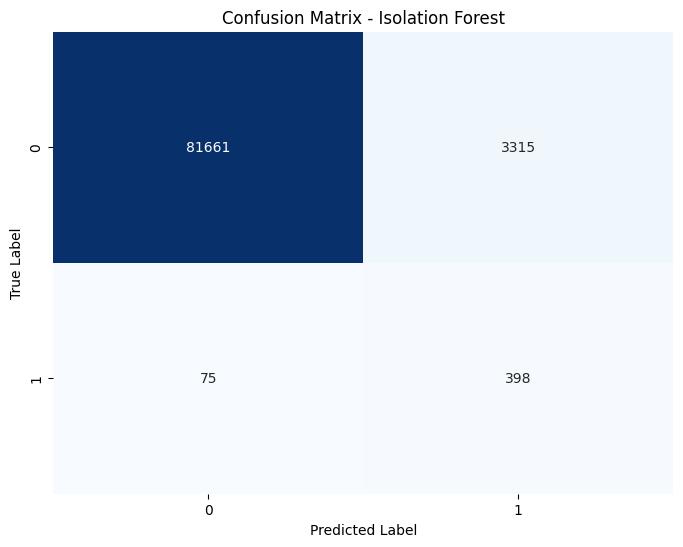

In [179]:
if_cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(if_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Isolation Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

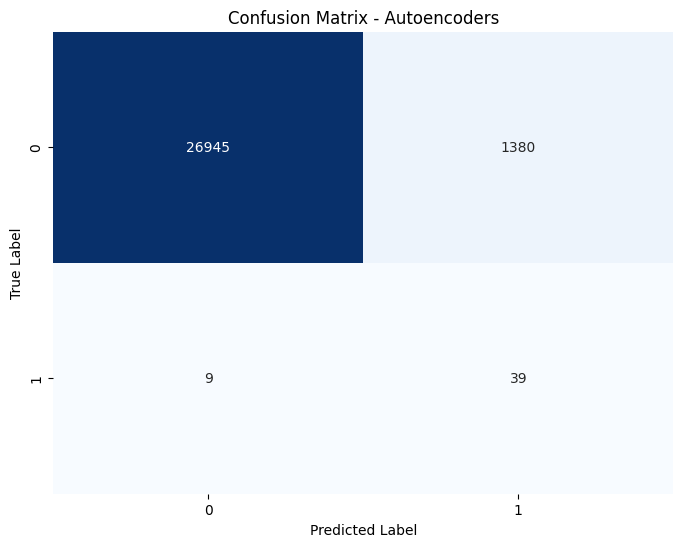

In [180]:
ae_cm = confusion_matrix(y_test, anomalies)

plt.figure(figsize=(8, 6))
sns.heatmap(ae_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Autoencoders')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

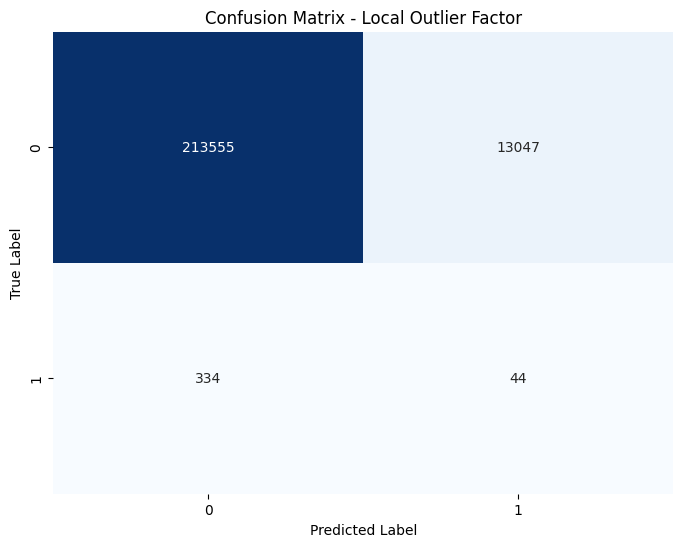

In [184]:
lof_cm = confusion_matrix(y_train, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(lof_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Local Outlier Factor')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Comparison of Model Performance**

# **8. Detection of Fraud**

**Input Parameters**

**Defining Input Features (Time, Amount, V1-V28)**

**Preprocessing Input Data**

**Prediction through V-Score Input**

**Function for Fraud Prediction**

**Example Use Case with Input Parameters**